In [1]:
import pandas as pd
import zipfile
import os
import sys
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [6]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
vars_serg = ["estadoOrden","Ciudad","Departamento",
             "stado_producto","Marca","Pasillo","Categoria",
             "ProductoEnPromocion","cantidadVendida",
             "TotalPagado","Domicilio","PrecioFinal",
             "FechaCreaciónOrden"]

In [7]:
vars_group_b = ["FechaCreaciónOrden",
                'month_year',
                "Ciudad",
                "Departamento",
                "estadoOrden",
                "stado_producto",
                "Marca",
                "Pasillo",
                "Categoria",
                "ProductoEnPromocion"]

In [11]:
df.columns

Index(['order_product_id', 'order_id', 'parent_order_id', 'child_order_id',
       'estadoOrden', 'user_id', 'TotalPagado', 'MetodoPago', 'Domicilio',
       'DescuentoAdicional', 'FechaCreaciónOrden', 'FechaProgramaciónOrden',
       'FechadeEntregaOrden', 'plataforma', 'sistemaOperativo', 'versionApp',
       'latitudPedido', 'longitud_pedido', 'Ciudad', 'sp_id_producto',
       'NombreProducto', 'Contenido', 'Unidad', 'fechacreacionProducto',
       'stado_producto', 'Marca', 'Departamento', 'Pasillo', 'Categoria',
       'sp_idCombo', 'cantidadVendida', 'precioOriginal', 'precio',
       'ProductoEnPromocion', 'TipoProduct', 'PrecioProductoEstimado',
       'PrecioFinal'],
      dtype='object')

In [15]:
df = pd.read_csv("../Data/MERQ_CONS",
                      encoding='latin1',
                     dtype={'estadoOrden' : str,
                            "NombreProducto" : str,
                            "FechaCreaciónOrden" : str,
                            "ProductoEnPromocion" : np.float64,
                            "cantidadVendida" : np.float64},
                 usecols = ['estadoOrden',
                            "NombreProducto",
                            "FechaCreaciónOrden",
                            "ProductoEnPromocion",
                            "cantidadVendida"])

In [16]:
df["FechaCreaciónOrden"] = pd.to_datetime(df.FechaCreaciónOrden)
df.set_index("FechaCreaciónOrden",drop=False,inplace=True)

In [24]:
df.dropna(inplace=True)

In [25]:
df.tail()

,estadoOrden,FechaCreaciónOrden,NombreProducto,cantidadVendida,ProductoEnPromocion
FechaCreaciónOrden,,,,,
2018-04-26,Initiated,2018-04-26,Alimento lácteo Alpinette Fresa,1.0,0.0
2018-04-26,Initiated,2018-04-26,Salsa Tomate Fruco Doypack,1.0,0.0
2018-04-26,Initiated,2018-04-26,Limpiador líquido Bicarbonato botella,1.0,0.0
2018-04-26,Initiated,2018-04-26,Lava loza líquido botella,1.0,0.0
2018-04-26,Initiated,2018-04-26,Café granulado Nescafé Tradición frasco,1.0,0.0


In [36]:
df[df.cantidadVendida>0]

,estadoOrden,FechaCreaciónOrden,NombreProducto,cantidadVendida,ProductoEnPromocion
FechaCreaciónOrden,,,,,
2017-02-13,Cancelled,2017-02-13,Té preparado durazno Justo y bueno botella,2.0,0.0
2017-02-13,Cancelled,2017-02-13,Té preparado durazno Justo y bueno Sin azúcar ...,5.0,0.0
2017-02-13,Cancelled,2017-02-13,Té preparado limón Justo y bueno botella,4.0,0.0
2017-02-13,Cancelled,2017-02-13,Huevos a Justo y bueno Rojo cubeta,1.0,1.0
2017-02-13,Cancelled,2017-02-13,Huevos aa Rojo cubeta,1.0,0.0
2017-02-13,Cancelled,2017-02-13,Huevos codorniz Justo y bueno cubeta,1.0,0.0
2017-02-13,Cancelled,2017-02-13,Papel higiénico Familia Acolchamax megarollo,1.0,0.0
2017-02-13,Cancelled,2017-02-13,Papel higiénico Justo y bueno Doble hoja,1.0,0.0
2017-02-13,Cancelled,2017-02-13,Papel higiénico Justo y bueno Triple hoja,1.0,1.0


In [27]:
with open("products_filter.txt","r") as f:
    products = f.read().split("\n")

In [61]:
df = df[(df.NombreProducto.isin(products)) & 
        (df.cantidadVendida<=np.percentile(df.cantidadVendida,q=99))]
df = df["2017-07":]

In [75]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras import callbacks

#configure early stopping
call_back_ = callbacks.EarlyStopping(monitor='val_loss', 
                              min_delta=0.00001, 
                              patience=5, 
                              verbose=1, 
                              mode='auto', 
                              baseline=None, 
                              restore_best_weights=False)


# arreglo de matriz
def create_sequence(df_,product):
    serie = df[df.NombreProducto==product]["cantidadVendida"].resample("D").sum()
    
    num_feat = 1
    serie_s = serie.copy()
    
    for i in range(num_feat):
        serie = pd.concat([serie,serie_s.shift(-(i+1))],axis=1) 
    serie.dropna(inplace=True)
    
    return serie

numpy.random.seed(7)

In [58]:

def train_test_reshape(serie):
    
    #dividir la data
    train_size = int(len(serie) * 0.7)
    test_size = len(serie) - train_size
    train, test = serie.iloc[0:train_size,:], serie.iloc[train_size:len(serie),:]

    trainX, trainY = train.iloc[:,:-1].values, train.iloc[:,-1].values
    testX, testY = test.iloc[:,:-1].values, test.iloc[:,-1].values

    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return {'X_train':trainX,'Y_train':trainY,
            'X_test':testX,'Y_test':testY}


In [119]:
data_trainig  = train_test_reshape(serie=create_sequence(df_=df,product=products[2]))

In [120]:
data_trainig.keys()

dict_keys(['X_train', 'Y_train', 'X_test', 'Y_test'])

In [121]:

model = Sequential()
model.add(LSTM(120,input_shape=(1, 1),return_sequences=True))
model.add(LSTM(120))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(data_trainig['X_train'], data_trainig['Y_train'], 
                    validation_data=(data_trainig['X_test'], data_trainig['Y_test']), 
                    epochs=200, 
                    batch_size=1, 
                    verbose=1,
                    callbacks=[call_back_])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1, 120)            58560     
_________________________________________________________________
lstm_28 (LSTM)               (None, 120)               115680    
_________________________________________________________________
dropout_14 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 121       
Total params: 174,361
Trainable params: 174,361
Non-trainable params: 0
_________________________________________________________________
Train on 209 samples, validate on 90 samples
Epoch 1/200
209/209 [==============================] - 6s 28ms/step - loss: 90.7361 - val_loss: 102.1224
Epoch 2/200
209/209 [==============================] - 1s 4ms/step - loss: 69.1127 - val_loss: 84.6571
Epoch 3/200
209

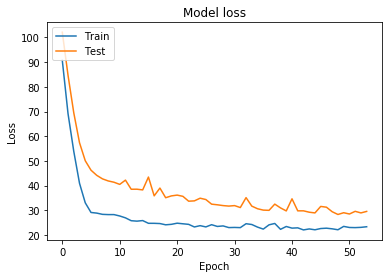

In [122]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

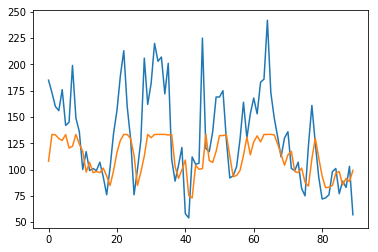

In [123]:
# predicciones
testPredict = model.predict(data_trainig['X_test'])
plt.plot(data_trainig['Y_test'])
plt.plot(testPredict)

In [117]:
metrics.mean_absolute_error(testPredict,data_trainig['Y_test'])

42.582797580295136

In [118]:
np.sqrt(metrics.mean_squared_error(testPredict,data_trainig['Y_test']))

43.511817012791674

In [116]:
from sklearn import metrics

In [314]:

# normalizar los datos (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(df_ts.iloc[:,1:])
dataset = df_ts.iloc[:,1:].values

In [315]:
# arreglo de matriz
def create_dataset(dataset, col, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), col]
		dataX.append(a)
		dataY.append(dataset[i + look_back, col])
	return numpy.array(dataX), numpy.array(dataY)
numpy.random.seed(7)

#dividir la data
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train,columns_model[0][0], look_back)
testX, testY = create_dataset(test,columns_model[0][0], look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [187]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# # invertir la normalizacion
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])


# #calcular el rsme
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))


# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:, :] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

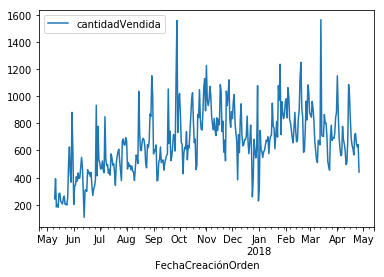

In [376]:
testY.shape

(90,)

In [360]:
# modelo 500 - 1 
# # model.add(Dropout(0.5))
# model.add(LSTM(32))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation="relu"))
# model.compile(loss='mean_absolute_error', optimizer='adam')
# history = model.fit(trainX, trainY, 
#                     validation_data=(testX, testY), 
#                     epochs=1000, 
#                     batch_size=15, 
#                     verbose=1,
#                     callbacks=[call_back_])

# modelo 500 - 1 
model = Sequential()
model.add(LSTM(500))
model.add(Dropout(0.7))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()
history = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=1000, 
                    batch_size=30, 
                    verbose=1,
                    callbacks=[call_back_])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_189 (LSTM)              (None, 1, 256)            270336    
_________________________________________________________________
lstm_190 (LSTM)              (None, 500)               1514000   
_________________________________________________________________
dropout_110 (Dropout)        (None, 500)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 501       
Total params: 1,784,837
Trainable params: 1,784,837
Non-trainable params: 0
_________________________________________________________________
Train on 241 samples, validate on 57 samples
Epoch 1/1000
241/241 [==============================] - 47s 194ms/step - loss: 598.6383 - val_loss: 770.2325
Epoch 2/1000
241/241 [==============================] - 2s 8ms/step - loss: 550.7135 - val_loss: 733.6514
Epoc

241/241 [==============================] - 2s 8ms/step - loss: 183.8109 - val_loss: 234.3050
Epoch 70/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8276 - val_loss: 234.3873
Epoch 71/1000
241/241 [==============================] - 2s 8ms/step - loss: 184.2269 - val_loss: 234.2647
Epoch 72/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8380 - val_loss: 234.2189
Epoch 73/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.8520 - val_loss: 233.9969
Epoch 74/1000
241/241 [==============================] - 2s 8ms/step - loss: 180.0309 - val_loss: 231.5884
Epoch 75/1000
241/241 [==============================] - 2s 8ms/step - loss: 179.1337 - val_loss: 230.6695
Epoch 76/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.0113 - val_loss: 230.6174
Epoch 77/1000
241/241 [==============================] - 2s 8ms/step - loss: 181.4391 - val_loss: 232.9206
Epoch 78/1000
241/241 [============================

KeyboardInterrupt: 

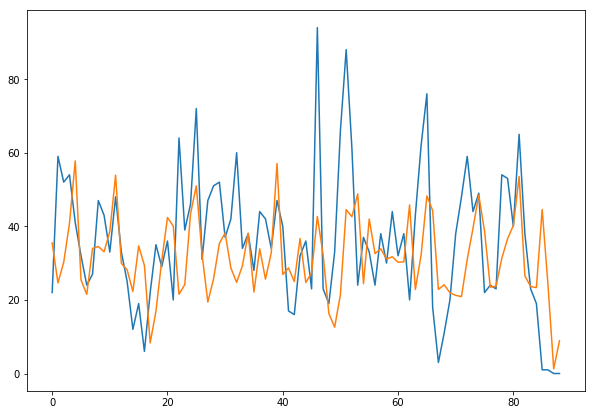

In [345]:
# predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(10,7))
plt.plot(testY)
plt.plot(testPredict)

11.698018074035645